In [1]:
%matplotlib inline

# Using Cartopy and AxesGrid toolkit
----------------------------------

This example demonstrates how to use cartopy `GeoAxes` with
`AxesGrid` from the `mpl_toolkits.axes_grid1`.
The script constructs an `axes_class` kwarg with Plate Carree projection
and passes it to the `AxesGrid` instance. The `AxesGrid` built-in
labelling is switched off, and instead a standard procedure
of creating grid lines is used. Then some fake data is plotted.



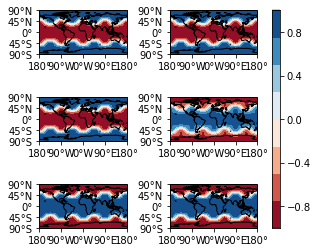

In [2]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np


def sample_data_3d(shape):
    """Return `lons`, `lats`, `times` and fake `data`"""
    ntimes, nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    times = np.linspace(-1, 1, ntimes)
    new_shape = data.shape + (ntimes, )
    data = np.rollaxis(data.repeat(ntimes).reshape(new_shape), -1)
    data *= times[:, np.newaxis, np.newaxis]

    return lons, lats, times, data


def main():
    projection = ccrs.PlateCarree()
    axes_class = (GeoAxes,
                  dict(map_projection=projection))

    lons, lats, times, data = sample_data_3d((6, 73, 145))

    fig = plt.figure()
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(3, 2),
                    axes_pad=0.6,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_mode

    for i, ax in enumerate(axgr):
        ax.coastlines()
        ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)
        ax.set_yticks(np.linspace(-90, 90, 5), crs=projection)
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        p = ax.contourf(lons, lats, data[i, ...],
                        transform=projection,
                        cmap='RdBu')

    axgr.cbar_axes[0].colorbar(p)

    plt.show()


if __name__ == '__main__':
    main()